# Assignment 1. Given a graph with six nodes and an edge list:  [(1, 2),(1, 3), (2, 3),(3, 4),(4, 5),(4, 6)].
The node attributes are as follows:
  Node 1: {"label": 0},
  Node   2: {"label": None},
  Node   3: {"label": 0},
  Node   4: {"label": None},
  Node  5: {"label": 1},
  Node  6: {"label": 1}

Question:

Predict the label of all nodes in the graph by using a Probabilistic Relational Classifier.

In [1]:
import random
from typing import Optional, Tuple
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [2]:
def seed_everything(seed: Optional[int] = None) -> None:
    random.seed(seed)
    np.random.seed(seed)
seed_everything(42)

In [3]:
class ProbabilisticRelationalClassifier:
    def __init__(
        self,
        max_iter: int = 10,
        threshold: float = 0.01,
        node_size: int = 2500,
        node_font_size: int = 10,
        title_font_size: int = 16,
        fig_size: Optional[Tuple[int, int]] = None,
        seed: int = 42,
    ) -> None:
        # Initialize the classifier with the given parameters
        self.max_iter = max_iter
        self.threshold = threshold
        self.node_size = node_size
        self.node_font_size = node_font_size
        self.title_font_size = title_font_size
        self.fig_size = fig_size
        self.seed = seed

    def _iteration(self) -> None:
        # Perform one iteration of probability updates
        for node in self._G.nodes(data=True):
            if node[1]["label"] is None: # Only update unlabeled nodes
                prob = np.mean([self._G.nodes[neighbor]["prob"] for neighbor in self._G.neighbors(node[0])])
                # If the change in probability is less than the threshold, update the node
                if abs(node[1]["prob"] - prob) < self.threshold:
                    node[1]["label"] = round(prob)
                # Otherwise, update the probability
                node[1]["prob"] = prob

    def _initialization(self):
        # Initialize the probabilities of the nodes
        for node in self._G.nodes(data=True):
            # Set initial probability to 0.5 if the node is unlabeled, 1.0 for labeled as 1, 0 for labeled as 0
            node[1]["prob"] = 0.5 if node[1]["label"] is None else 1.0 if node[1]["label"] else 0.0

    def _is_converged(self) -> bool:
        # Check if all nodes have been labeled
        return not any(label is None for _, label in nx.get_node_attributes(self._G, "label").items())

    def _draw(self) -> None:
        # Visualize the graph
        node_colors = [
            "tab:gray" if node[1]["label"] is None else "tab:blue" if node[1]["label"] else "tab:orange"
            for node in self._G.nodes(data=True)
        ]
        # Create labels with node ID and probability
        node_lables = {node[0]: f"{node[0]}\nP={node[1]['prob']:.2f}" for node in self._G.nodes(data=True)}
        pos = nx.spring_layout(self._G, seed=self.seed)
        # Draw the graph
        nx.draw(
            self._G,
            pos=pos,
            node_color=node_colors,
            labels=node_lables,
            node_size=self.node_size,
            font_size=self.node_font_size,
            with_labels=True,
        )

    def predict(self, G: nx.Graph, display: bool = True) -> nx.Graph:
        # Predict the labels of the graph G
        self._G = G.copy() # Work on a copy of the graph
        num_iter = 0
        self._initialization() # Initialize the probabilities
        if display:
            # Display the initial state
            plt.figure(figsize=self.fig_size)
            self._draw()
            plt.title("Initialization", fontsize=self.title_font_size, loc="left")
            plt.show()

        # Iterate until convergence or maximum iterations reached
        while not self._is_converged() and num_iter < self.max_iter:
            self._iteration()
            num_iter += 1
            if display:
                # Display the state after each iteration
                plt.figure(figsize=self.fig_size)
                self._draw()
                plt.title(f"After iteration {num_iter}", fontsize=self.title_font_size, loc="left")
                plt.show()

        return self._G

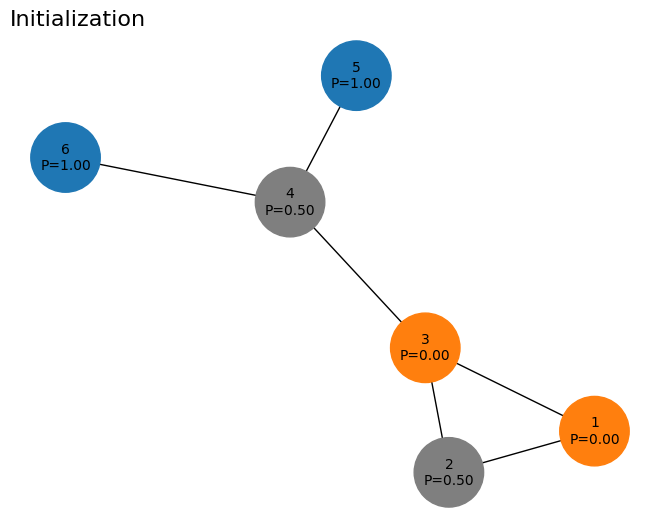

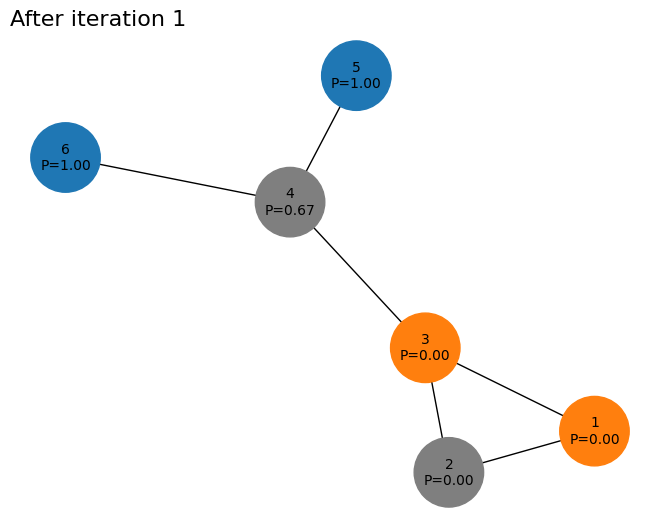

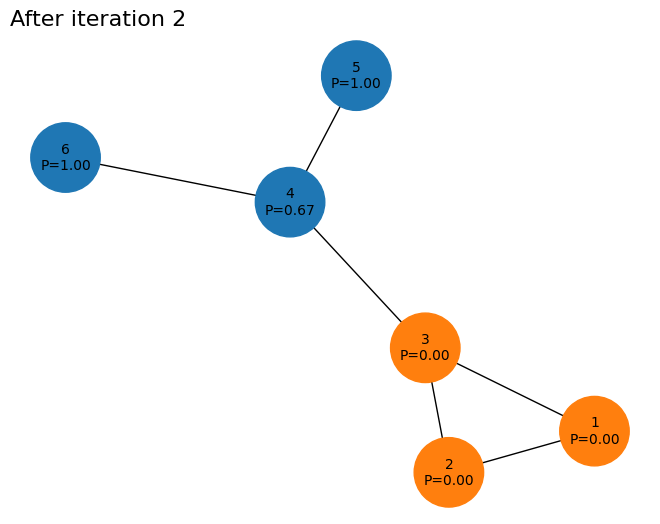

In [4]:
edge_list = [(1, 2),(1, 3), (2, 3),(3, 4),(4, 5),(4, 6)]

G = nx.Graph(edge_list)

attrs = {
    1: {"label": 0},
    2: {"label": None},
    3: {"label": 0},
    4: {"label": None},
    5: {"label": 1},
    6: {"label": 1}
}
nx.set_node_attributes(G, attrs)

clf = ProbabilisticRelationalClassifier()
_ = clf.predict(G)

# Assignment 2. Load the Cora dataset from Torch Geometric and then do the node classification task by using the GCN Model

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import gif

print(plt.style.available)

%matplotlib inline
plt.style.use("ggplot")
gif.options.matplotlib["dpi"] = 300

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [6]:
import torch
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='/tmp/Cora', name='Cora')
print(f'Dataset: {dataset}:')
print('======================')

print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')

print(f'Number of classes: {dataset.num_classes}')

/home/user/anaconda3/envs/GNN2/lib/python3.9/site-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: /home/user/anaconda3/envs/GNN2/lib/python3.9/site-packages/torch_cluster/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-cluster'. "


Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7


In [7]:
cora = dataset[0]
print(cora)

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


In [8]:
print(f'Cora graph is undirected: {cora.is_undirected()}')

Cora graph is undirected: True


In [9]:
edge_index = cora.edge_index
print(edge_index.t())

tensor([[ 633,    0],
        [1862,    0],
        [2582,    0],
        ...,
        [ 598, 2707],
        [1473, 2707],
        [2706, 2707]])


In [10]:
feature_mat = cora.x

print("Feature matrix:")
print(feature_mat)

print("\nFeature vector for node 0:")
print(feature_mat[0])

Feature matrix:
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

Feature vector for node 0:
tensor([0., 0., 0.,  ..., 0., 0., 0.])


In [11]:
labels = cora.y

print(labels)

tensor([3, 4, 4,  ..., 3, 3, 3])


In [12]:
print("Training mask:")
print(cora.train_mask)

Training mask:
tensor([ True,  True,  True,  ..., False, False, False])


In [13]:
print(f'Total number of nodes: {cora.num_nodes}')
print(f'Number of training nodes: {cora.train_mask.sum()}')
print(f'Training node label rate: {int(cora.train_mask.sum()) / cora.num_nodes:.2f}')

Total number of nodes: 2708
Number of training nodes: 140
Training node label rate: 0.05


In [14]:
def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()

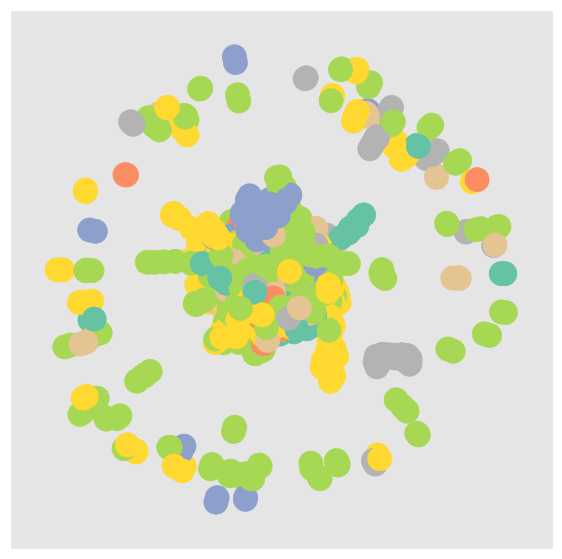

In [15]:
from torch_geometric.utils import to_networkx

G = to_networkx(cora, to_undirected=True)
visualize_graph(G, color=cora.y)

In [16]:
import torch
import torch.nn as nn
from torch.nn import Parameter
import torch.nn.functional as F

# Define the GCNConv class (Graph Convolution Layer)
class GCNConv(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        # Define the weight matrix for the GCN layer
        self.weight = Parameter(torch.randn(in_channels, out_channels))

    def forward(self, x, edge_index):
        # Initialize node aggregation output
        row, col = edge_index
        # Normalize based on node degree
        deg = torch.bincount(row, minlength=x.size(0)).float()  # Degree of each node
        deg_inv_sqrt = deg.pow(-0.5)  # D^(-0.5)
        deg_inv_sqrt[deg_inv_sqrt == float('inf')] = 0  # Handle division by zero

        # Apply normalization to node features
        norm = deg_inv_sqrt[row] * deg_inv_sqrt[col]

        # Aggregate neighbors’ features (message passing)
        agg = torch.zeros_like(x)
        agg.index_add_(0, row, x[col] * norm.view(-1, 1))  # Aggregate neighbor features

        # Apply the learned weight matrix
        out = agg @ self.weight

        return out

# Define GCN model with two layers
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        # Define two GCN layers
        self.gcn1 = GCNConv(in_channels, hidden_channels)
        self.gcn2 = GCNConv(hidden_channels, hidden_channels)

        # Classifier layer
        self.classifier = nn.Linear(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        # First GCN layer with ReLU activation
        x = self.gcn1(x, edge_index)
        x = F.relu(x)

        # Second GCN layer with ReLU activation
        x = self.gcn2(x, edge_index)
        x = F.relu(x)

        # Apply the classifier layer
        out = self.classifier(x)

        return out

model = GCN(in_channels=10, hidden_channels=16, out_channels=3)

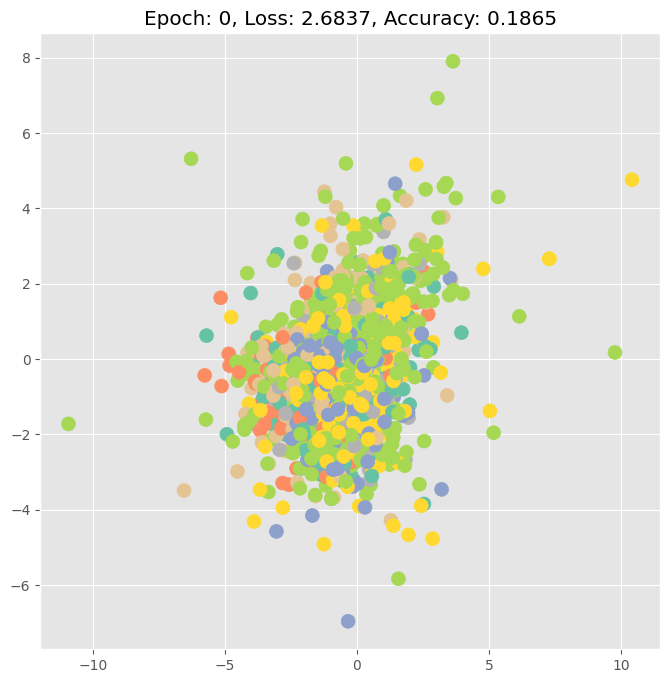

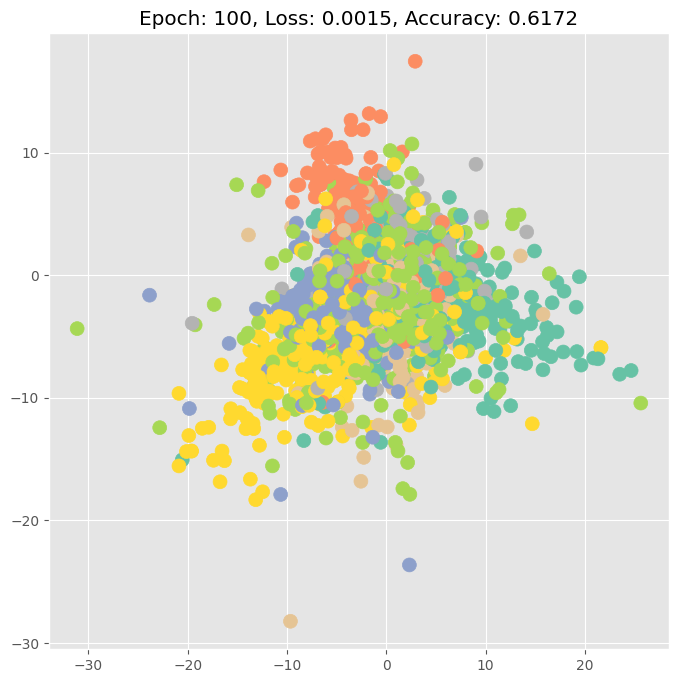

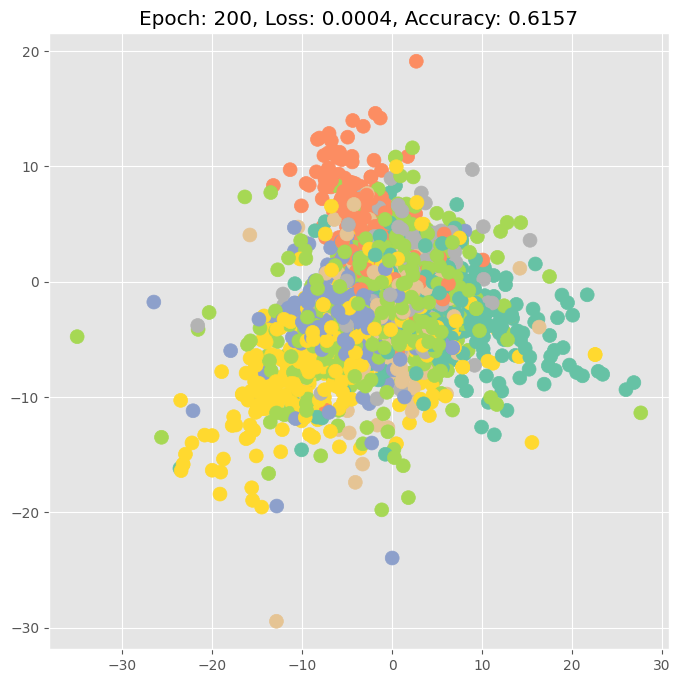

In [17]:
import time
import torch
from IPython.display import Javascript
import matplotlib.pyplot as plt

model = GCN(dataset.num_features, 16, dataset.num_classes)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

def accuracy(preds, labels):
    _, indices = torch.max(preds, dim=1)
    correct = (indices == labels).sum().item()
    return correct / len(labels)

def train(data):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

    acc = accuracy(out[~data.train_mask], data.y[~data.train_mask])
    return loss, out, acc

def visualize_embedding(h, color, epoch, loss, acc):
    plt.figure(figsize=(8, 8))
    plt.scatter(h[:, 0].detach(), h[:, 1].detach(), c=color, cmap="Set2", s=100)
    plt.title(f"Epoch: {epoch}, Loss: {loss.item():.4f}, Accuracy: {acc:.4f}")
    plt.show()

frames = []
for epoch in range(300):
    loss, out, acc = train(cora)

    if epoch % 100 == 0:
        h = out.detach()
        visualize_embedding(h, color=cora.y, epoch=epoch, loss=loss, acc=acc)
        time.sleep(0.3)

In [18]:
train_output = model(cora.x, cora.edge_index)
train_accuracy = accuracy(train_output[cora.train_mask], cora.y[cora.train_mask])

test_accuracy = accuracy(train_output[~cora.train_mask], cora.y[~cora.train_mask])

total_accuracy = accuracy(train_output, cora.y)

print(f"Train accuracy: {train_accuracy * 100:.2f} %")
print(f"Test accuracy: {test_accuracy * 100:.2f} %")
print(f"Dataset accuracy: {total_accuracy * 100:.2f} %")

Train accuracy: 100.00 %
Test accuracy: 61.92 %
Dataset accuracy: 63.88 %
